# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement
Use 25-30 predictors in your model

## Executive Summary

### Contents:
- [Data Import & Cleaning](#Data-Import-and-Cleaning)

In [26]:
#Imports:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet

pd.set_option('display.max_columns', None)


sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Data Import and Cleaning

In [2]:
sample = pd.read_csv('./datasets/sample_sub_reg.csv',keep_default_na=False) #assign sample_sub_reg.csv to sample
test = pd.read_csv('./datasets/test.csv',keep_default_na=False) #assign test.csv to test
train = pd.read_csv('./datasets/train.csv',keep_default_na=False) #assign train.csv to train


In [3]:
# Changing train column names to lower case strings and using '_' for spaces
train.columns = [col.lower() for col in train.columns] 
train.columns = [col.replace(' ','_') for col in train.columns]


In [4]:
# Changing test column names to lower case strings and using '_' for spaces
test.columns = [col.lower() for col in test.columns] 
test.columns = [col.replace(' ','_') for col in test.columns]


In [5]:
879/2 #calculate 50% of each column total entries

439.5

In [6]:
#train.info()

In [7]:
#train.describe()

In [8]:
#convert train columns with pd.to_numeric()
train[['lot_frontage', 'lot_area','mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf',
       'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf','low_qual_fin_sf', 'gr_liv_area', 'garage_cars', 
       'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'saleprice', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces']] = train[['lot_frontage', 'lot_area',
       'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf',
       'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf','low_qual_fin_sf', 'gr_liv_area', 'garage_cars', 
       'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'saleprice', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces']].apply(pd.to_numeric) 
                   

In [9]:
#convert numerical columns to float
train[['lot_frontage', 'lot_area','mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf',
       'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf','low_qual_fin_sf', 'gr_liv_area', 'garage_cars', 
       'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'saleprice', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces']] = train[['lot_frontage', 'lot_area',
       'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf',
       'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf','low_qual_fin_sf', 'gr_liv_area', 'garage_cars', 
       'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'saleprice', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces']].astype(float)

In [10]:
#convert train columns to object
train[['ms_subclass', 'ms_zoning', 'street', 'alley', 'lot_shape' ,'land_contour','utilities','lot_config','land_slope',
'neighborhood' ,'condition_1' ,'condition_2' ,'bldg_type' ,'house_style','overall_qual','overall_cond','year_built','year_remod/add',
'roof_style','roof_matl','exterior_1st','exterior_2nd','mas_vnr_type','exter_qual','exter_cond','foundation','bsmt_qual','bsmt_cond',
'bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','heating','heating_qc','central_air','electrical','kitchen_qual','functional',
'fireplace_qu','garage_type','garage_yr_blt','garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence','misc_feature',
'mo_sold','yr_sold','sale_type']] = train[['ms_subclass', 'ms_zoning', 'street', 'alley', 'lot_shape' ,'land_contour','utilities','lot_config','land_slope',
'neighborhood' ,'condition_1' ,'condition_2' ,'bldg_type' ,'house_style','overall_qual','overall_cond','year_built','year_remod/add',
'roof_style','roof_matl','exterior_1st','exterior_2nd','mas_vnr_type','exter_qual','exter_cond','foundation','bsmt_qual','bsmt_cond',
'bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','heating','heating_qc','central_air','electrical','kitchen_qual','functional',
'fireplace_qu','garage_type','garage_yr_blt','garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence','misc_feature',
'mo_sold','yr_sold','sale_type']].astype(str)

In [11]:
#Replace '' values in rows with np.nan
train = train.replace('',np.nan)

In [12]:
#convert test columns with pd.to_numeric()
test[['lot_frontage', 'lot_area','mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf',
       'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf','low_qual_fin_sf', 'gr_liv_area', 'garage_cars', 
       'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces']] = test[['lot_frontage', 'lot_area',
       'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf',
       'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf','low_qual_fin_sf', 'gr_liv_area', 'garage_cars', 
       'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces']].apply(pd.to_numeric) 

In [13]:
#convert numerical columns to float
test[['lot_frontage', 'lot_area','mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf',
       'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf','low_qual_fin_sf', 'gr_liv_area', 'garage_cars', 
       'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces']] = test[['lot_frontage', 'lot_area',
       'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf',
       'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf','low_qual_fin_sf', 'gr_liv_area', 'garage_cars', 
       'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces']].astype(float)

In [14]:
#convert train columns to object
test[['ms_subclass', 'ms_zoning', 'street', 'alley', 'lot_shape' ,'land_contour','utilities','lot_config','land_slope',
'neighborhood' ,'condition_1' ,'condition_2' ,'bldg_type' ,'house_style','overall_qual','overall_cond','year_built','year_remod/add',
'roof_style','roof_matl','exterior_1st','exterior_2nd','mas_vnr_type','exter_qual','exter_cond','foundation','bsmt_qual','bsmt_cond',
'bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','heating','heating_qc','central_air','electrical','kitchen_qual','functional',
'fireplace_qu','garage_type','garage_yr_blt','garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence','misc_feature',
'mo_sold','yr_sold','sale_type']] = test[['ms_subclass', 'ms_zoning', 'street', 'alley', 'lot_shape' ,'land_contour','utilities','lot_config','land_slope',
'neighborhood' ,'condition_1' ,'condition_2' ,'bldg_type' ,'house_style','overall_qual','overall_cond','year_built','year_remod/add',
'roof_style','roof_matl','exterior_1st','exterior_2nd','mas_vnr_type','exter_qual','exter_cond','foundation','bsmt_qual','bsmt_cond',
'bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','heating','heating_qc','central_air','electrical','kitchen_qual','functional',
'fireplace_qu','garage_type','garage_yr_blt','garage_finish','garage_qual','garage_cond','paved_drive','pool_qc','fence','misc_feature',
'mo_sold','yr_sold','sale_type']].astype(str)

In [15]:
#Replace '' values in rows with np.nan
train = train.replace('',np.nan)

In [16]:
#Dropping PID column as it's just unique identifier
#Dropping Alley, Fireplace Qu, Pool QC, Fence and Misc Feature as NA categorical values make up bulk of their columns 
coldrop = ['pid','alley', 'fireplace_qu', 'pool_qc', 'fence', 'misc_feature']
train = train.drop(coldrop,axis=1)
test = test.drop(coldrop,axis=1)

In [17]:
test['garage_cond'].unique()

array(['Po', 'TA', 'NA', 'Fa', 'Gd', 'Ex'], dtype=object)

In [34]:
#to see columns with null values
trainnull_colns = train.columns[train.isnull().any()]
train[trainnull_colns].isnull().sum().sort_values(ascending=False)

lot_frontage      330
garage_yr_blt     114
mas_vnr_type       22
mas_vnr_area       22
bsmt_exposure       4
bsmt_half_bath      2
bsmt_full_bath      2
bsmtfin_type_2      2
bsmtfin_sf_1        1
bsmt_qual           1
bsmt_cond           1
bsmtfin_type_1      1
garage_cond         1
garage_qual         1
bsmt_unf_sf         1
total_bsmt_sf       1
garage_finish       1
garage_cars         1
garage_area         1
bsmtfin_sf_2        1
dtype: int64

In [47]:
train[train['bsmt_exposure'].isnull()]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,20,RM,99.0,5940.0,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896.0,0.0,0.0,896.0,NaN,NaN,1.0,0.0,2.0,1.0,TA,4.0,Typ,0.0,Detchd,1946,Unf,1.0,280.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2008,ConLD,79000.0
1456,1797,60,FV,81.0,10411.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725.0,863.0,0.0,1588.0,0.0,0.0,3.0,0.0,3.0,1.0,Gd,8.0,Typ,0.0,Attchd,2007,Unf,2.0,561.0,TA,TA,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,2007,New,212109.0
1547,67,20,RL,73.0,8987.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595.0,0.0,0.0,1595.0,0.0,0.0,2.0,0.0,2.0,1.0,Gd,6.0,Typ,1.0,Attchd,2005,RFn,3.0,880.0,TA,TA,Y,144.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2010,WD,221500.0
1997,2780,60,RL,65.0,14006.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936.0,840.0,0.0,1776.0,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,1.0,Attchd,2002,RFn,2.0,474.0,TA,TA,Y,144.0,96.0,0.0,0.0,0.0,0.0,0.0,2,2006,WD,192500.0


In [48]:
train[train['mas_vnr_type'].isnull()]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
22,2393,60,RL,103.0,12867.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209.0,1044.0,0.0,2253.0,0.0,0.0,2.0,1.0,3.0,1.0,Ex,8.0,Typ,1.0,Attchd,2005,Fin,2.0,575.0,TA,TA,Y,243.0,142.0,0.0,0.0,0.0,0.0,0.0,7,2006,New,344133.0
41,2383,20,RL,107.0,13891.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076.0,0.0,0.0,2076.0,1.0,0.0,2.0,1.0,2.0,1.0,Ex,7.0,Typ,1.0,Attchd,2006,Fin,3.0,850.0,TA,TA,Y,216.0,229.0,0.0,0.0,0.0,0.0,0.0,9,2006,New,465000.0
86,539,20,RL,67.0,10083.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200.0,0.0,0.0,1200.0,1.0,0.0,2.0,0.0,2.0,1.0,Gd,5.0,Typ,0.0,Attchd,2003,RFn,2.0,555.0,TA,TA,Y,0.0,41.0,0.0,0.0,0.0,0.0,0.0,8,2009,WD,184900.0
212,518,20,FV,90.0,7993.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436.0,0.0,0.0,1436.0,0.0,0.0,2.0,0.0,3.0,1.0,Gd,6.0,Typ,0.0,Attchd,2008,Fin,2.0,529.0,TA,TA,Y,0.0,121.0,0.0,0.0,0.0,0.0,0.0,10,2009,New,225000.0
276,2824,20,RL,75.0,8050.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914.0,0.0,0.0,914.0,1.0,0.0,1.0,0.0,2.0,1.0,Gd,4.0,Typ,0.0,NA,NaN,NA,0.0,0.0,NA,NA,N,32.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2006,WD,117250.0
338,1800,60,FV,112.0,12217.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,Ex,Y,SBrkr,955.0,925.0,0.0,1880.0,1.0,0.0,2.0,1.0,3.0,1.0,Ex,8.0,Typ,1.0,Attchd,2007,Fin,3.0,880.0,TA,TA,Y,168.0,127.0,0.0,0.0,0.0,0.0,0.0,12,2007,New,310013.0
431,1455,60,RL,75.0,9473.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128.0,903.0,0.0,2031.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,1.0,Attchd,2002,RFn,2.0,577.0,TA,TA,Y,0.0,211.0,0.0,0.0,0.0,0.0,0.0,3,2008,WD,237000.0
451,1120,20,RL,87.0,10037.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460.0,0.0,0.0,1460.0,0.0,0.0,2.0,0.0,3.0,1.0,Gd,6.0,Typ,1.0,Attchd,2006,Fin,2.0,480.0,TA,TA,Y,0.0,20.0,0.0,0.0,0.0,0.0,0.0,8,2008,WD,247000.0
591,1841,120,FV,35.0,4274.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241.0,0.0,0.0,1241.0,1.0,0.0,1.0,1.0,1.0,1.0,Gd,4.0,Typ,0.0,Attchd,2007,Fin,2.0,569

In [36]:
#to see columns with null values
testnull_colns = train.columns[train.isnull().any()]
test[testnull_colns].isnull().sum().sort_values(ascending=False)

lot_frontage      160
mas_vnr_area        1
garage_qual         0
mas_vnr_type        0
bsmt_qual           0
bsmt_cond           0
bsmt_exposure       0
bsmtfin_type_1      0
bsmtfin_sf_1        0
bsmtfin_type_2      0
garage_cond         0
bsmt_unf_sf         0
total_bsmt_sf       0
bsmt_full_bath      0
bsmt_half_bath      0
garage_yr_blt       0
garage_finish       0
garage_cars         0
garage_area         0
bsmtfin_sf_2        0
dtype: int64

 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf','total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 
'low_qual_fin_sf', 'gr_liv_area', 'garage_cars', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', 
'3ssn_porch', 'screen_porch','pool_area', 'misc_val', 'saleprice', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 
'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces']])

In [39]:
traindf = pd.DataFrame(train.isnull().sum())
traindf[traindf[0]!=0]

,0
lot_frontage,330
mas_vnr_type,22
mas_vnr_area,22
bsmt_qual,1
bsmt_cond,1
bsmt_exposure,4
bsmtfin_type_1,1
bsmtfin_sf_1,1
bsmtfin_type_2,2
bsmtfin_sf_2,1


In [19]:
#see which train columns have more than 50% of its entries null
[col for i,col in enumerate(train) if (train[col].isnull().sum())>1025] 

[]

In [20]:
#see which test columns have more than 50% of its entries null
[col for i,col in enumerate(test) if (test[col].isnull().sum())>439] 

[]

In [21]:
y = train['saleprice']

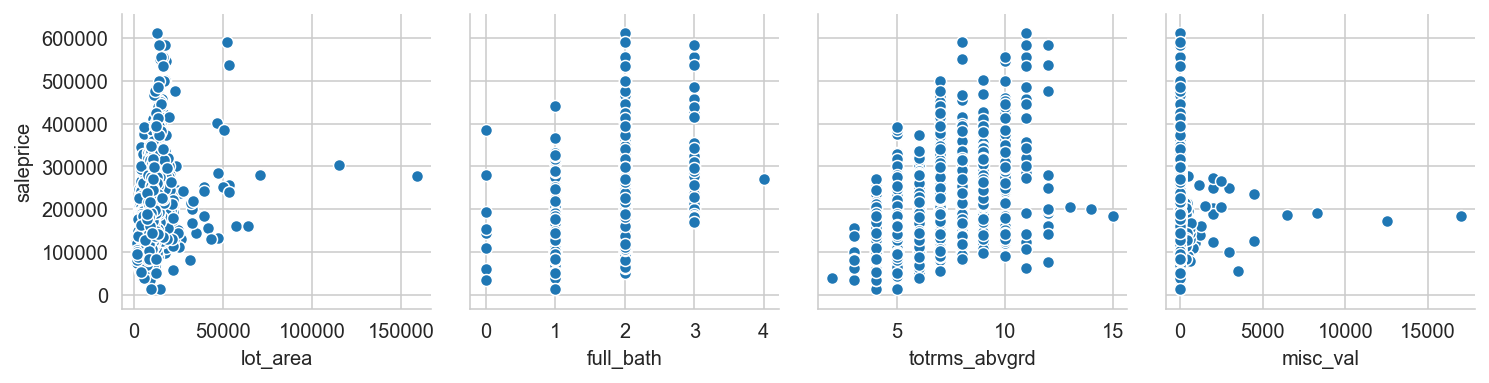

In [22]:
sns.pairplot(train, x_vars = ['lot_area','full_bath','totrms_abvgrd','misc_val'],y_vars=['saleprice'])

In [23]:
train['misc_val'].value_counts()

0.0        1986
400.0        12
500.0         8
600.0         6
450.0         5
2000.0        5
700.0         4
4500.0        2
2500.0        2
1200.0        2
3000.0        2
8300.0        1
6500.0        1
1500.0        1
480.0         1
54.0          1
460.0         1
800.0         1
80.0          1
1300.0        1
650.0         1
17000.0       1
300.0         1
900.0         1
3500.0        1
1150.0        1
455.0         1
12500.0       1
Name: misc_val, dtype: int64